In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.io import wavfile 
import audioread 
import librosa

In [2]:
ROOT_DIR = 'cats_dogs/'
CSV_PATH = 'train_test_split.csv'

def load_audio_data():
    """
    Reads audio files and returns the time series, sampling rates, channel count, and wav file names
    """
    df = pd.read_csv(CSV_PATH)
    file_names, time_series, sampling_rates, channels = [], [] ,[], []
    durations = []

    for k in ['train_cat', 'train_dog', 'test_cat', 'test_dog']:
        v = list(df[k].dropna())
        
        for f in v:
            file_names.append(ROOT_DIR+f)
            # Read and get data and sampling rate of audio
            ts, sr = librosa.load(ROOT_DIR + f,sr=16000)
            time_series.append(ts)
            sampling_rates.append(sr)
            
            # Calculate duration of each file
            duration = len(ts) / sr 
            durations.append(duration)

            # Count number of channels within audio 
            with audioread.audio_open(ROOT_DIR + f) as input_file:
                channels.append(input_file.channels)
        
    return file_names, time_series, sampling_rates, channels, durations

def extract_mel_features(time_series):
    freq, mfccs, delta_mfcc, spectral = [],[],[],[]
    for i in range(20):
        mfccs.append([])
        delta_mfcc.append([])

    zcrs = []

    for ts in time_series:
        # Store frequencies
        fr = librosa.feature.melspectrogram(y=ts,sr=16000)
        freq.append(fr)
        # delta_mel.append(librosa.feature.delta(fr))
        
        # Store MFCCs and corresponding deltas     
        mfcc = librosa.feature.mfcc(S=librosa.power_to_db(fr),sr=16000)
        j=0
        for coef in mfcc:
            mfccs[j].append(np.mean(coef))
            j += 1

        delta = librosa.feature.delta(mfcc)
        j=0
        for coef in delta:
            delta_mfcc[j].append(np.mean(coef))
            j += 1

        #Spectral Centroid
        spectral.append(np.mean(librosa.feature.spectral_centroid(ts, sr=16000)[0]))

        #Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(ts)
        zcrs.append(zcr)

    return freq, mfccs, delta_mfcc, spectral, zcrs

#Adding the class label to the dataframe
def add_class(row):
    name = row[len(ROOT_DIR): ] 
    label = None
    if 'cat' in name:
        label = 'cat'
    elif 'dog' in name:
        label = 'dog'
    return label

def get_dataframe():
    names, ts, sr, channels, durations = load_audio_data()
    fr, mfccs, mfcc_deltas, spectral, zcrs = extract_mel_features(ts)
    i = 0
    audio = pd.DataFrame({'file':names, 'data':ts, 'sample rate':sr,'channel count':channels, 'duration':durations, 'frequency':fr, 'spectral':spectral, 'zcrs': zcrs})
    for coef in mfccs:
        audio[("mfccs_" + str(i))] = coef
        i += 1
    i = 0
    for coef in mfcc_deltas:
        audio[("mfcc_deltas_" + str(i))] = coef
        i += 1
    print(audio.head())
    audio['label'] = audio.apply(lambda x: add_class(x['file']),axis=1)
    audio['label'] = audio['label'].astype('category')
    audio['label'] = audio['label'].cat.codes # Turn to binary
    return audio
    

In [3]:
def load_audio_data():
    """
    Reads audio files and returns the time series, sampling rates, channel count, and wav file names
    """
    df = pd.read_csv(CSV_PATH)
    file_names, time_series, sampling_rates, channels = [], [] ,[], []
    durations = []

    for k in ['train_cat', 'train_dog', 'test_cat', 'test_dog']:
        v = list(df[k].dropna())
        
        for f in v:
            file_names.append(ROOT_DIR+f)
            # Read and get data and sampling rate of audio
            ts, sr = librosa.load(ROOT_DIR + f,sr=16000)
            time_series.append(ts)
            sampling_rates.append(sr)
            
            # Calculate duration of each file
            duration = len(ts) / sr 
            durations.append(duration)

            # Count number of channels within audio 
            with audioread.audio_open(ROOT_DIR + f) as input_file:
                channels.append(input_file.channels)
        
    return file_names, time_series, sampling_rates, channels, durations

def extract_mel_features(time_series):
    freq, mfccs, delta_mfcc, spectral = [],[],[],[]
    for i in range(20):
        mfccs.append([])
        delta_mfcc.append([])

    zcrs = []

    for ts in time_series:
        # Store frequencies
        fr = librosa.feature.melspectrogram(y=ts,sr=16000)
        freq.append(fr)
        # delta_mel.append(librosa.feature.delta(fr))
        
        # Store MFCCs and corresponding deltas     
        mfcc = librosa.feature.mfcc(S=librosa.power_to_db(fr),sr=16000)
        j=0
        for coef in mfcc:
            mfccs[j].append(np.mean(coef))
            j += 1

        delta = librosa.feature.delta(mfcc)
        j=0
        for coef in delta:
            delta_mfcc[j].append(np.mean(coef))
            j += 1

        #Spectral Centroid
        spectral.append(np.mean(librosa.feature.spectral_centroid(ts, sr=16000)[0]))

        #Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(ts)
        zcrs.append(zcr)

    return freq, mfccs, delta_mfcc, spectral, zcrs

In [4]:
df = get_dataframe()
df.head()

                    file                                               data  \
0   cats_dogs/cat_99.wav  [-0.07397461, -0.05130005, -0.0053710938, 0.04...   
1   cats_dogs/cat_54.wav  [0.014190674, 0.016448975, 0.015899658, 0.0152...   
2   cats_dogs/cat_34.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  cats_dogs/cat_132.wav  [0.0077819824, 0.009796143, 0.0093688965, 0.00...   
4  cats_dogs/cat_124.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

   sample rate  channel count  duration  \
0        16000              1   12.0000   
1        16000              1    1.0845   
2        16000              1    8.7480   
3        16000              1   15.1920   
4        16000              1    1.0800   

                                           frequency     spectral  \
0  [[0.2109778, 0.052674465, 0.00015328123, 0.000...  1598.893983   
1  [[0.0013635816, 0.0035894401, 0.0044356594, 0....  2437.098603   
2  [[6.644849e-07, 4.310075e-05, 0.0051410776, 0....  1281.

,file,data,sample rate,channel count,duration,frequency,spectral,zcrs,mfccs_0,mfccs_1,...,mfcc_deltas_11,mfcc_deltas_12,mfcc_deltas_13,mfcc_deltas_14,mfcc_deltas_15,mfcc_deltas_16,mfcc_deltas_17,mfcc_deltas_18,mfcc_deltas_19,label
0,cats_dogs/cat_99.wav,"[-0.07397461, -0.05130005, -0.0053710938, 0.04...",16000,1,12.0000,"[[0.2109778, 0.052674465, 0.00015328123, 0.000...",1598.893983,"[[0.0771484375, 0.1279296875, 0.1650390625, 0....",-194.707199,99.847656,...,0.003924,0.005392,-0.005643,0.031492,-0.005564,-0.016342,-0.002001,-0.008718,0.036849,0
1,cats_dogs/cat_54.wav,"[0.014190674, 0.016448975, 0.015899658, 0.0152...",16000,1,1.0845,"[[0.0013635816, 0.0035894401, 0.0044356594, 0....",2437.098603,"[[0.03857421875, 0.08251953125, 0.1318359375, ...",-88.782837,3.256525,...,0.398066,0.592418,0.644422,-0.372851,-0.656578,0.063303,0.194134,-0.611455,0.442843,0
2,cats_dogs/cat_34.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,1,8.7480,"[[6.644849e-07, 4.310075e-05, 0.0051410776, 0....",1281.184181,"[[0.0927734375, 0.125, 0.13525390625, 0.130371...",-286.294128,109.240646,...,0.077671,-0.013944,-0.062312,0.048385,0.031412,0.153095,0.030733,0.057251,-0.050334,0
3,cats_dogs/cat_132.wav,"[0.0077819824, 0.009796143, 0.0093688965, 0.00...",16000,1,15.1920,"[[0.00078292354, 0.0033641942, 0.006507087, 0....",2265.702371,"[[0.08056640625, 0.115234375, 0.1484375, 0.153...",-258.444000,64.014389,...,0.057374,-0.022963,-0.031294,-0.022776,-0.040346,0.080164,-0.052787,-0.004106,0.009949,0
4,cats_dogs/cat_124.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,1,1.0800,"[[1.0567337e-06, 0.022469442, 0.41236275, 0.83...",2403.586549,"[[0.1015625, 0.13818359375, 0.16259765625, 0.1...",-227.679825,21.780346,...,0.798200,0.426519,0.059524,0.254191,-0.019861,0.100791,-0.388498,-0.445977,-0.426929,0


In [5]:
test,sr = librosa.load(df.loc[4,"file"])
print(df['label'])

0      0
1      0
2      0
3      0
4      0
      ..
272    1
273    1
274    1
275    1
276    1
Name: label, Length: 277, dtype: int8


In [6]:
#Getting Spectral_Centroids
spectral_centroids = librosa.feature.spectral_centroid(test, sr=sr)[0]
print(spectral_centroids.shape)  # Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

(47,)


(20, 47)


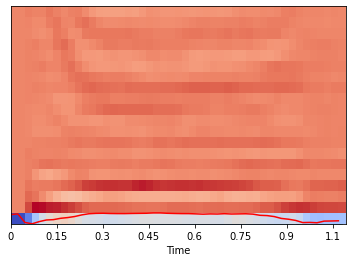

In [7]:
import librosa.display
import sklearn as sk

# Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(test, sr=sr, alpha=0.4)
plt.plot(t, sk.preprocessing.minmax_scale(spectral_centroids, axis=0), color='r')

#Mel Cepstral
mfccs = librosa.feature.mfcc(test, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [8]:
def print_stats(y_test, pred):
    cm = sk.metrics.confusion_matrix(y_test, np.round(pred), labels=[0, 1])
    print("Confusion Matrix:\n ", cm)
    print("\nTest Accuracy = ", str(sk.metrics.accuracy_score(y_test, np.round(pred))))
    print("\nError rate = ", str(1-sk.metrics.accuracy_score(y_test, np.round(pred))))
    tn, fp, fn, tp = cm.ravel()
    if (tp+fp != 0):
        print("\nTrue Positive = ", tp / (tp + fp))
    else:
        print("True positive NaN")
    if (tp + fn != 0):
        print("\nTrue Negative = ", tn / (tn + fn))
    else:
        print("True Negative NaN")

In [9]:
#Lets try fitting a model with this stuff
predictor = ["spectral"]

predictor.extend(["mfccs_" + str(i) for i in range(20)])
predictor.extend(["mfcc_deltas_" + str(i) for i in range(20)])
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(
   df[predictor], df["label"].values, test_size=0.3, random_state=42)
model = sk.linear_model.LogisticRegression().fit(x_train,y_train)
pred = model.predict(x_test)
print_stats(y_test, pred)

Confusion Matrix:
  [[44  5]
 [ 5 30]]

Test Accuracy =  0.8809523809523809

Error rate =  0.11904761904761907

True Positive =  0.8571428571428571

True Negative =  0.8979591836734694


/home/plam/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#Lots of predictors so prune pretty aggressively
model = sk.linear_model.Lasso(.67).fit(x_train,y_train)
pred = model.predict(x_test)
print_stats(y_test, pred)
best_predictors = []
for coef_ind in range(len(model.coef_)):
    if model.coef_[coef_ind] != 0:
        best_predictors.append(predictor[coef_ind])
print("Best predictors = ", best_predictors)

Confusion Matrix:
  [[44  5]
 [ 6 29]]

Test Accuracy =  0.8690476190476191

Error rate =  0.13095238095238093

True Positive =  0.8529411764705882

True Negative =  0.88
Best predictors =  ['spectral', 'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4']


In [11]:
# Using only the mfcc coefficients and its deltas
X = df[predictor]
mels = X.drop(columns=["spectral"])
y = df['label'].values
mels.drop(mels.iloc[:,20:], inplace=True, axis=1)

deltas = X.drop(columns=['spectral'])
deltas.drop(deltas.iloc[:,0:20],inplace=True, axis=1)

data = np.vstack((np.array(mels),np.array(deltas)))
mel_df = pd.DataFrame(data)
new_y = np.hstack((df['label'],df['label']))

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    mel_df.values, new_y, test_size=0.25, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': np.linspace(0.1,10,30), 
              'gamma': np.linspace(0.1,10,30),
              'kernel': ['rbf']} 

grid = GridSearchCV(sk.svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.7827586206896

[CV 4/5] END .....C=0.1, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=0.1, gam

[CV 1/5] END C=0.4413793103448276, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4413793103448276, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4413793103448276, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4413793103448276, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4413793103448276, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4413793103448276, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4413793103448276, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4413793103448276, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4413793103448276, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4413793103448276, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4413793103448276, gamma=4.537931034482758, kernel=rbf; total time=   0.0s

[CV 1/5] END C=0.7827586206896552, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7827586206896552, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7827586206896552, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7827586206896552, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7827586206896552, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7827586206896552, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7827586206896552, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7827586206896552, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7827586206896552, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7827586206896552, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7827586206896552, gamma=1.4655172413793105, kernel=rbf; total time= 

[CV 1/5] END C=0.7827586206896552, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7827586206896552, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7827586206896552, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7827586206896552, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7827586206896552, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7827586206896552, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7827586206896552, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7827586206896552, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7827586206896552, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7827586206896552, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7827586206896552, gamma=8.63448275862069, kernel=rbf; total time=   0.0s


[CV 5/5] END C=1.124137931034483, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.124137931034483, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.124137931034483, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.124137931034483, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.124137931034483, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.124137931034483, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.124137931034483, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.124137931034483, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.124137931034483, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.124137931034483, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.124137931034483, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 4/5] END C=1.4655172413793105, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4655172413793105, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4655172413793105, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4655172413793105, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4655172413793105, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4655172413793105, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4655172413793105, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4655172413793105, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4655172413793105, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4655172413793105, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4655172413793105, gamma=1.806896551724138, kernel=rbf; total time=  

[CV 1/5] END C=1.4655172413793105, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4655172413793105, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4655172413793105, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4655172413793105, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4655172413793105, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4655172413793105, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4655172413793105, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4655172413793105, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4655172413793105, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4655172413793105, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4655172413793105, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 

[CV 1/5] END C=1.806896551724138, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.806896551724138, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.806896551724138, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.806896551724138, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.806896551724138, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.806896551724138, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.806896551724138, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.806896551724138, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.806896551724138, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.806896551724138, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.806896551724138, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 2/5] E

[CV 4/5] END C=2.148275862068966, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.148275862068966, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.148275862068966, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.148275862068966, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.148275862068966, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.148275862068966, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.148275862068966, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.148275862068966, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.148275862068966, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.148275862068966, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.148275862068966, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 5

[CV 1/5] END C=2.148275862068966, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.148275862068966, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.148275862068966, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.148275862068966, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.148275862068966, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.148275862068966, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.148275862068966, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.148275862068966, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.148275862068966, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.148275862068966, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.148275862068966, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 2/5] EN

[CV 4/5] END C=2.4896551724137934, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4896551724137934, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4896551724137934, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4896551724137934, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4896551724137934, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4896551724137934, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4896551724137934, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4896551724137934, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4896551724137934, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4896551724137934, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4896551724137934, gamma=4.537931034482758, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.831034482758621, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.831034482758621, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.831034482758621, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.831034482758621, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.831034482758621, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.831034482758621, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.831034482758621, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.831034482758621, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.831034482758621, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.831034482758621, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.831034482758621, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[C

[CV 1/5] END C=2.831034482758621, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.831034482758621, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.831034482758621, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.831034482758621, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.831034482758621, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.831034482758621, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.831034482758621, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.831034482758621, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.831034482758621, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.831034482758621, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.831034482758621, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 2/5] E

[CV 2/5] END C=3.1724137931034484, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.1724137931034484, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.1724137931034484, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.1724137931034484, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.1724137931034484, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.1724137931034484, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.1724137931034484, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.1724137931034484, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.1724137931034484, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.1724137931034484, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.1724137931034484, gamma=3.855172413793104, kernel=rbf; total time=   

[CV 5/5] END C=3.1724137931034484, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=3.1724137931034484, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=3.1724137931034484, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=3.1724137931034484, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=3.1724137931034484, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=3.1724137931034484, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=3.513793103448276, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=3.513793103448276, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=3.513793103448276, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=3.513793103448276, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=3.513793103448276, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.513793103448276, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 2/5]

[CV 2/5] END C=3.513793103448276, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.513793103448276, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.513793103448276, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.513793103448276, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.513793103448276, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.513793103448276, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.513793103448276, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.513793103448276, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.513793103448276, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.513793103448276, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.513793103448276, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 3/5] END C=3.855172413793104, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.855172413793104, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.855172413793104, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.855172413793104, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.855172413793104, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.855172413793104, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.855172413793104, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.855172413793104, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.855172413793104, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.855172413793104, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.855172413793104, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 4

[CV 5/5] END C=3.855172413793104, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.855172413793104, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.855172413793104, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.855172413793104, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.855172413793104, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.855172413793104, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=3.855172413793104, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=3.855172413793104, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=3.855172413793104, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=3.855172413793104, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=3.855172413793104, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=4.196551724137931, gamma=0.1, kerne

[CV 5/5] END C=4.196551724137931, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.196551724137931, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.196551724137931, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.196551724137931, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.196551724137931, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.196551724137931, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.196551724137931, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.196551724137931, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.196551724137931, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.196551724137931, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.196551724137931, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 3/5] END C=4.537931034482758, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.537931034482758, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.537931034482758, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.537931034482758, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.537931034482758, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.537931034482758, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.537931034482758, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.537931034482758, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.537931034482758, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.537931034482758, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.537931034482758, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 4

[CV 4/5] END C=4.537931034482758, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.537931034482758, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.537931034482758, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.537931034482758, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.537931034482758, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.537931034482758, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.537931034482758, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.537931034482758, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.537931034482758, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.537931034482758, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.537931034482758, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 5/5] END

[CV 5/5] END C=4.879310344827586, gamma=4.879310344827586, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.879310344827586, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.879310344827586, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.879310344827586, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.879310344827586, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.879310344827586, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.879310344827586, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.879310344827586, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.879310344827586, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.879310344827586, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.879310344827586, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 5/5] END C=5.220689655172413, gamma=1.124137931034483, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.220689655172413, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.220689655172413, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.220689655172413, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.220689655172413, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.220689655172413, gamma=1.4655172413793105, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.220689655172413, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.220689655172413, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.220689655172413, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.220689655172413, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.220689655172413, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 1

[CV 4/5] END C=5.220689655172413, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.220689655172413, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.220689655172413, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.220689655172413, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.220689655172413, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.220689655172413, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.220689655172413, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.220689655172413, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.220689655172413, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.220689655172413, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.220689655172413, gamma=8.293103448275863, kernel=rbf; total time=   0.0s
[CV 5/5] E

[CV 2/5] END C=5.562068965517241, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.562068965517241, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.562068965517241, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.562068965517241, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.562068965517241, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.562068965517241, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.562068965517241, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.562068965517241, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.562068965517241, gamma=4.196551724137931, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.562068965517241, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.562068965517241, gamma=4.537931034482758, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 4/5] END .....C=5.903448275862069, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=5.903448275862069, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.903448275862069, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.903448275862069, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.903448275862069, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.903448275862069, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.903448275862069, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.903448275862069, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.903448275862069, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.903448275862069, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.903448275862069, gamma=0.7827586206896552, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.90

[CV 2/5] END C=5.903448275862069, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.903448275862069, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.903448275862069, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.903448275862069, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.903448275862069, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.903448275862069, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.903448275862069, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.903448275862069, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.903448275862069, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.903448275862069, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.903448275862069, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 4/5] END C=6.244827586206896, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.244827586206896, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.244827586206896, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.244827586206896, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.244827586206896, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.244827586206896, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.244827586206896, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.244827586206896, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.244827586206896, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.244827586206896, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.244827586206896, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 5/5]

[CV 3/5] END ....C=6.244827586206896, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=6.244827586206896, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=6.244827586206896, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=6.586206896551724, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=6.586206896551724, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=6.586206896551724, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=6.586206896551724, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=6.586206896551724, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.586206896551724, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.586206896551724, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.586206896551724, gamma=0.4413793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.586206896551724, gamma=0.4413793103448276, kernel=rbf; total t

[CV 5/5] END C=6.586206896551724, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.586206896551724, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.586206896551724, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.586206896551724, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.586206896551724, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.586206896551724, gamma=6.586206896551724, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.586206896551724, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.586206896551724, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.586206896551724, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.586206896551724, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.586206896551724, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 2/5] END C=6.927586206896551, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.927586206896551, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.927586206896551, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.927586206896551, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.927586206896551, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.927586206896551, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.927586206896551, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.927586206896551, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.927586206896551, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.927586206896551, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.927586206896551, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 

[CV 5/5] END C=6.927586206896551, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.927586206896551, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.927586206896551, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.927586206896551, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.927586206896551, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.927586206896551, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.927586206896551, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.927586206896551, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.927586206896551, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.927586206896551, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.927586206896551, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 2/5] END C=7.268965517241379, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.268965517241379, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.268965517241379, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.268965517241379, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.268965517241379, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.268965517241379, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.268965517241379, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.268965517241379, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.268965517241379, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.268965517241379, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.268965517241379, gamma=6.244827586206896, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 4/5] END C=7.610344827586207, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.610344827586207, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.610344827586207, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.610344827586207, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.610344827586207, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.610344827586207, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.610344827586207, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.610344827586207, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.610344827586207, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.610344827586207, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.610344827586207, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 5/

[CV 2/5] END C=7.610344827586207, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.610344827586207, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.610344827586207, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.610344827586207, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.610344827586207, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.610344827586207, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.610344827586207, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.610344827586207, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.610344827586207, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.610344827586207, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.610344827586207, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 3/5] END C

[CV 2/5] END C=7.951724137931034, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.951724137931034, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.951724137931034, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.951724137931034, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.951724137931034, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.951724137931034, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.951724137931034, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.951724137931034, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.951724137931034, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.951724137931034, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.951724137931034, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 3/5] END C=8.293103448275863, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.293103448275863, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.293103448275863, gamma=1.806896551724138, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.293103448275863, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.293103448275863, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.293103448275863, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.293103448275863, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.293103448275863, gamma=2.148275862068966, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.293103448275863, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.293103448275863, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.293103448275863, gamma=2.4896551724137934, kernel=rbf; total time=   0.0s
[CV 4/5

[CV 4/5] END C=8.293103448275863, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.293103448275863, gamma=8.63448275862069, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.293103448275863, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.293103448275863, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.293103448275863, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.293103448275863, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.293103448275863, gamma=8.975862068965517, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.293103448275863, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.293103448275863, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.293103448275863, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.293103448275863, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 5/5] END

[CV 3/5] END C=8.63448275862069, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.63448275862069, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.63448275862069, gamma=5.220689655172413, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.63448275862069, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.63448275862069, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.63448275862069, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.63448275862069, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.63448275862069, gamma=5.562068965517241, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.63448275862069, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.63448275862069, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.63448275862069, gamma=5.903448275862069, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.6344

[CV 3/5] END C=8.975862068965517, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.975862068965517, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.975862068965517, gamma=2.831034482758621, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.975862068965517, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.975862068965517, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.975862068965517, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.975862068965517, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.975862068965517, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.975862068965517, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.975862068965517, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.975862068965517, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 4

[CV 2/5] END C=8.975862068965517, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.975862068965517, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.975862068965517, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.975862068965517, gamma=9.317241379310344, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.975862068965517, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.975862068965517, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.975862068965517, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.975862068965517, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.975862068965517, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=8.975862068965517, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=8.975862068965517, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=8.9758620

[CV 1/5] END C=9.317241379310344, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.317241379310344, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.317241379310344, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.317241379310344, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.317241379310344, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.317241379310344, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.317241379310344, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.317241379310344, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.317241379310344, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.317241379310344, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.317241379310344, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 2/5] E

[CV 1/5] END C=9.658620689655173, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.658620689655173, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.658620689655173, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.658620689655173, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.658620689655173, gamma=3.1724137931034484, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.658620689655173, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.658620689655173, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.658620689655173, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.658620689655173, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.658620689655173, gamma=3.513793103448276, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.658620689655173, gamma=3.855172413793104, kernel=rbf; total time=   0.0s
[CV 2

[CV 3/5] END C=9.658620689655173, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.658620689655173, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.658620689655173, gamma=9.658620689655173, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=9.658620689655173, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=9.658620689655173, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=9.658620689655173, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=9.658620689655173, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=9.658620689655173, gamma=10.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[

[CV 5/5] END ....C=10.0, gamma=6.927586206896551, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.0, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=10.0, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=10.0, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=10.0, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=10.0, gamma=7.268965517241379, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.0, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=10.0, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=10.0, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=10.0, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=10.0, gamma=7.610344827586207, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.0, gamma=7.951724137931034, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=10.0, gam

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.68      0.95      0.80        86
           1       0.79      0.28      0.42        53

    accuracy                           0.70       139
   macro avg       0.74      0.62      0.61       139
weighted avg       0.72      0.70      0.65       139



In [14]:
def assign_color(x):
    if x == 0:
        return "C0"
    else:
        return "C1"

Text(0.5, 1.0, 'Clustering using all noncategorical predictors')

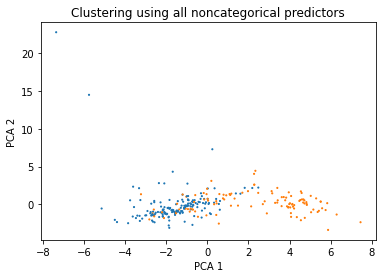

In [15]:
# Try clustering
X = df[predictor]
y = df["label"]
X = sk.preprocessing.scale(X)
pca = sk.decomposition.PCA(n_components = 2, svd_solver='full', random_state = 42)
pca.fit(X)
Xa = pca.transform(X)
plt.scatter(Xa[:,0],Xa[:,1],color=[assign_color(x) for x in y],marker='.',s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering using all noncategorical predictors')

In [16]:
data2 = np.array(data)
data2 = sk.preprocessing.scale(data2)
pca = sk.decomposition.PCA(n_components=2, svd_solver='full', random_state = 42)
pca.fit(data)
Xa = pca.transform(data)

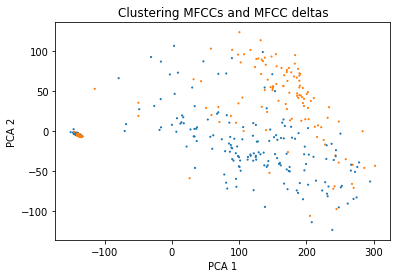

In [17]:
plt.scatter(Xa[:,0], Xa[:,1],color=[assign_color(x) for x in new_y],marker='.',s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering MFCCs and MFCC deltas')
plt.show()

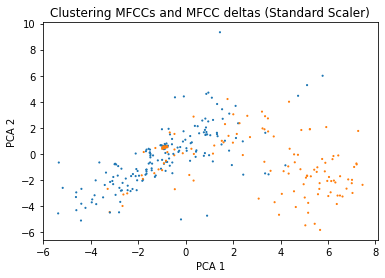

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

data2 = np.array(data)

pca = Pipeline([('scaler', StandardScaler()), ('clf', sk.decomposition.PCA(n_components = 2, svd_solver='full', random_state = 42))])
pca.fit(data2)
Xa = pca.transform(data2)
plt.scatter(Xa[:,0], Xa[:,1],color=[assign_color(x) for x in new_y],marker='.',s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering MFCCs and MFCC deltas (Standard Scaler)')
plt.show()

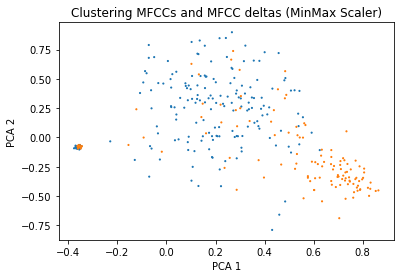

In [19]:
pca = Pipeline([('scaler', MinMaxScaler()), ('clf', sk.decomposition.PCA(n_components = 2, svd_solver='full', random_state = 42))])
pca.fit(data2)
Xa = pca.transform(data2)
plt.scatter(Xa[:,0], Xa[:,1],color=[assign_color(x) for x in new_y],marker='.',s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering MFCCs and MFCC deltas (MinMax Scaler)')
plt.show()